# 1. Instalação e importação de bibliotecas necessárias

*  Instalar e atualizar pacotes necessários
*  Importar bibliotecas do scikit-learn, seaborn e matplotlib

In [ ]:
# Instalando os pacotes

# !pip install pandas
# !pip install numpy
# !pip install sympy
# !pip install scipy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install pingouin
# !pip install pyshp


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 2. Carregar e explorar dados


In [ ]:
# Carregar os dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer-wisconsin.data"
df = pd.read_csv(url, names=["uniformity_cell_size", "uniformity_cell_shape",
                             "area", "compactness", "class"])

# Tratar valores ausentes
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Converter para tipo numérico
df = df.astype(float)

# Mapear a variável alvo (2 = benigno, 4 = maligno)
df["class"] = df["class"].map({2: 0, 4: 1})

# Exibir as primeiras linhas do dataset
df.head()


,,,,,,uniformity_cell_size,uniformity_cell_shape,area,compactness,class
1000025,5,1,1,1,2,1.0,3.0,1.0,1.0,0
1002945,5,4,4,5,7,10.0,3.0,2.0,1.0,0
1015425,3,1,1,1,2,2.0,3.0,1.0,1.0,0
1016277,6,8,8,1,3,4.0,3.0,7.0,1.0,0
1017023,4,1,1,3,2,1.0,3.0,1.0,1.0,0


* Analise Descritiva

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniformity_cell_size,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
uniformity_cell_shape,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
area,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
compactness,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
class,683.0,0.349927,0.477296,0.0,0.0,0.0,1.0,1.0


# 3. Particionamento treino e teste

In [ ]:
# Separar features e variável de interesse
X = df.drop(columns=["class"])
y = df["class"]

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (546, 4)
Tamanho do conjunto de teste: (137, 4)


# 4. Treinamento de modelos

*  Random Forest

In [ ]:
# Treinando e fazendo o fit do modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf.predict(X_test)

# Exibindo as métricas de avaliação
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))



Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.92      0.94      0.93        48

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



In [ ]:
# Exibindo a acurácia
accuracy = accuracy_score(y_test, y_pred_rf)
print(f" Acurácia do modelo: {accuracy:.4f}")

 Acurácia do modelo: 0.9489


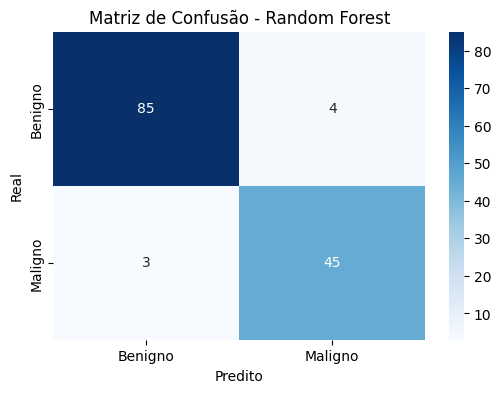

In [ ]:
# Criando e exibindo a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Benigno", "Maligno"], yticklabels=["Benigno", "Maligno"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# 5. Importância das variáveis

<ipython-input-164-12904ec53610>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




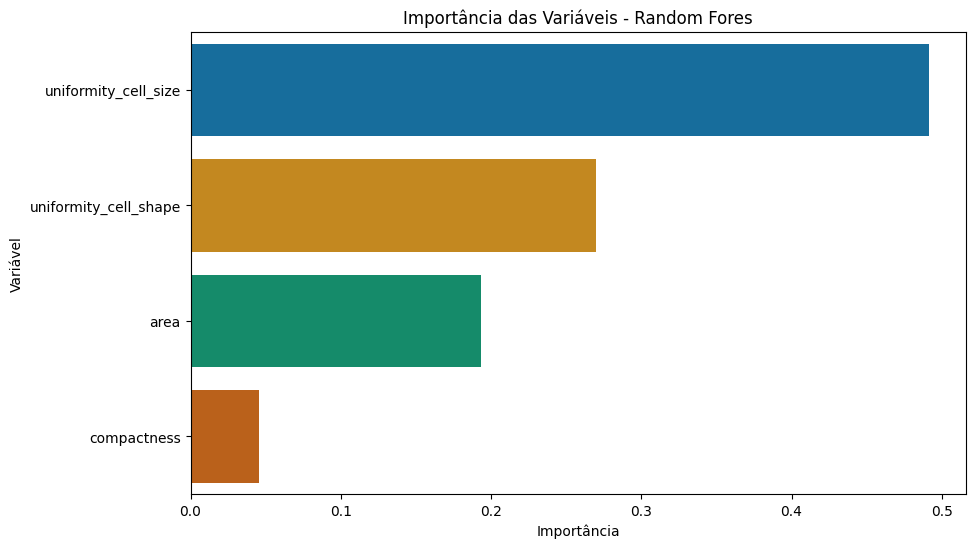

In [ ]:
#Importância das variáveis no XGBoost
importances_rf = rf.feature_importances_


df_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})
df_importance_rf = df_importance_rf.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance_rf, palette="colorblind")
plt.title("Importância das Variáveis - Random Fores")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()


* Suppot Vector Machine (SVM)

In [ ]:
# Criando o modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)  # Pode testar outros kernels como 'rbf', 'linear' ou 'poly'

# Treinando o modelo
svm_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_svm = svm_model.predict(X_test)

# Calculando acurácia
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do modelo SVM: {accuracy_svm:.4f}")

# Exibindo relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Acurácia do modelo SVM: 0.9489
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.92      0.94      0.93        48

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



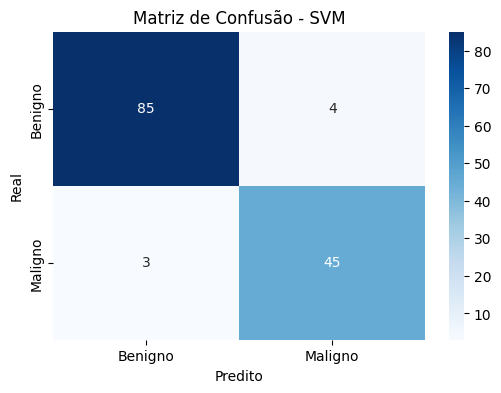

In [ ]:
# Criando e exibindo a matriz de confusão
cm_SVM = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=["Benigno", "Maligno"], yticklabels=["Benigno", "Maligno"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()

# Regressão Linear Simples

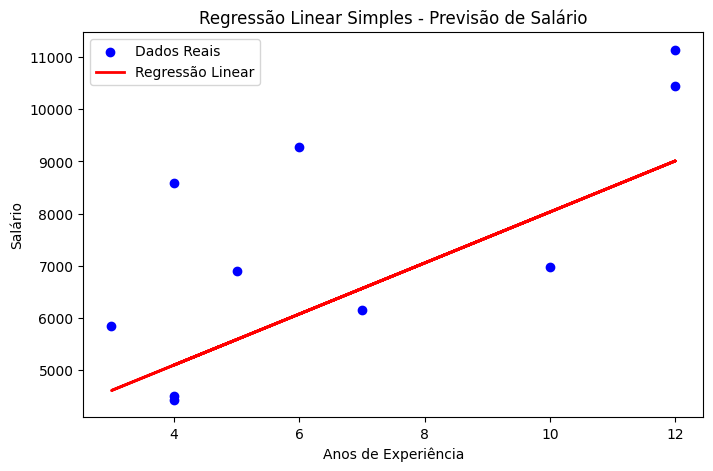

Coeficiente Angular (b1): 488.20
Intercepto (b0): 3150.09


In [5]:
from sklearn.linear_model import LinearRegression

# Gerando dados fictícios
np.random.seed(42)
X = np.random.randint(1, 20, size=(50, 1))  # Anos de experiência
y = 3000 + 500 * X + np.random.normal(0, 2000, size=(50, 1))  # Salário com ruído

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.title("Regressão Linear Simples - Previsão de Salário")
plt.legend()
plt.show()

# Exibindo coeficientes
print(f"Coeficiente Angular (b1): {modelo.coef_[0][0]:.2f}")
print(f"Intercepto (b0): {modelo.intercept_[0]:.2f}")

----------------

# Exemplo Aprendizado de máquina não supervisonado

# 1. Instalação e importação de bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# 2. Carregando o banco de dados

In [ ]:
# Carregando o dataset
casas = pd.read_excel("preco_casas.xlsx")

# Informacoes
casas_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   distance_to_school          4954 non-null   float64
 5   house_age                   4954 non-null   int64  
 6   distance_to_supermarket_km  4954 non-null   float64
 7   crime_rate_index            4954 non-null   float64
 8   property_value              4954 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 348.5 KB


In [ ]:
# prompt: Me ajude a fazer analise descrita usando descrit.T

casas_num.describe().T


,count,mean,std,min,25%,50%,75%,max
land_size_sqm,4954.0,250.131409,103.131939,100.00,180.00,235.00,295.00,796.00
house_size_sqm,4954.0,231.250908,94.571642,85.00,165.00,217.50,274.00,760.00
no_of_rooms,4954.0,3.788252,1.585371,1.00,3.00,4.00,5.00,8.00
no_of_bathrooms,4954.0,3.199839,1.602300,1.00,2.00,3.00,4.00,9.00
distance_to_school,4954.0,3.454219,2.007358,0.10,1.70,3.40,5.20,6.90
house_age,4954.0,11.444691,6.356991,1.00,6.00,11.00,17.00,22.00
distance_to_supermarket_km,4954.0,3.508639,1.991266,0.10,1.80,3.50,5.30,6.90
crime_rate_index,4954.0,2.986110,1.737742,0.01,1.47,3.02,4.49,5.99
property_value,4954.0,201974.738999,90031.882219,32622.00,136777.00,194515.50,246590.00,692086.00


In [ ]:

# Selecionando apenas variáveis numéricas para análise
casas_num = casas.select_dtypes(include=['number']).dropna()

# Informacoes
casas_num

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
0,201,177,3,1,3.3,10,6.8,0.90,165432
1,196,182,4,3,1.2,11,4.1,1.42,187043
2,198,182,4,4,5.9,20,2.1,4.12,148658
3,178,166,2,3,5.9,5,0.7,4.36,123785
4,183,165,3,1,3.8,8,0.7,0.42,156470
...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99,235882
4950,302,282,4,2,3.8,12,4.8,2.09,290995
4951,153,147,3,4,3.3,7,4.7,3.98,106428
4952,180,158,2,1,2.2,1,3.4,3.75,107579


In [ ]:

# Normalizando os dados para padronizar as escalas
scaler = StandardScaler()
casas_scaled = scaler.fit_transform(casas_num)
print(casas_scaled)

[[-0.47644182 -0.5737067  -0.49725363 ...  1.65306572 -1.20059293
  -0.40592762]
 [-0.5249283  -0.52083139  0.13357722 ...  0.29700721 -0.90132383
  -0.1658662 ]
 [-0.5055337  -0.52083139  0.13357722 ... -0.70748058  0.65257341
  -0.59225821]
 ...
 [-0.94191202 -0.89095855 -0.49725363 ...  0.59835354  0.57200096
  -1.06136161]
 [-0.68008503 -0.77463287 -1.12808448 ... -0.05456352  0.43963194
  -1.04857596]
 [ 4.31402241  4.10047054  2.65690064 ... -1.5612952   0.95184251
   3.73244644]]


In [ ]:
# Matriz de correlações
corr = casas.corr()

In [ ]:
# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 750,
    width = 750,
    yaxis=dict(autorange="reversed"))

fig.show()

In [ ]:
# Selecionando as variáveis de interesse para a análise
casas_pca = casas.drop(columns=['property_value','crime_rate_index','distance_to_supermarket_km','house_age','distance_to_school'])
casas_pca

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms
0,201,177,3,1
1,196,182,4,3
2,198,182,4,4
3,178,166,2,3
4,183,165,3,1
...,...,...,...,...
4949,297,261,4,4
4950,302,282,4,2
4951,153,147,3,4
4952,180,158,2,1


# 3. PCA

In [ ]:
# Reduzindo para 2 componentes principais
pca = PCA(n_components=2)
casas_pca = pca.fit_transform(casas_scaled)

# 4. Visualizaçao dos Dados



In [ ]:
# Visualizando a variância explicada
print("Variação explicada pelos componentes:", pca.explained_variance_ratio_)

# Obtendo a variância explicada
var_exp = pca.explained_variance_ratio_ * 100  # Convertendo para porcentagem
pc1_percent = round(var_exp[0], 2)  # Primeira componente
pc2_percent = round(var_exp[1], 2)  # Segunda componente

Variação explicada pelos componentes: [0.48666153 0.11421308]


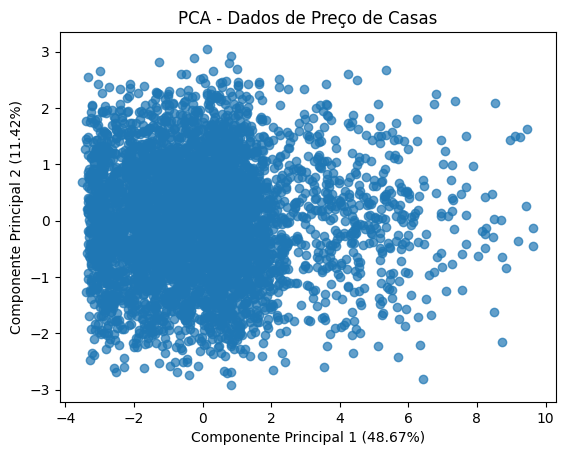

In [ ]:
# Plotando os dados reduzidos com os percentuais no eixo
plt.scatter(casas_pca[:, 0], casas_pca[:, 1], alpha=0.7)
plt.xlabel(f"Componente Principal 1 ({pc1_percent}%)")
plt.ylabel(f"Componente Principal 2 ({pc2_percent}%)")
plt.title("PCA - Dados de Preço de Casas")
plt.show()


# 5. Kmeans

In [ ]:
# Aplicando K-Means para agrupar os dados
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

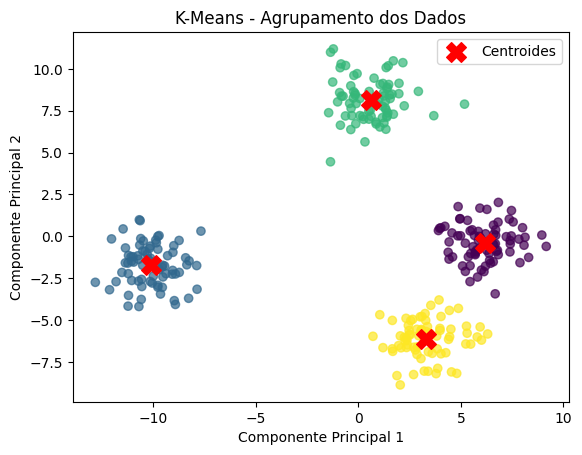

In [ ]:
# Visualizando os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="X", s=200, label="Centroides")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("K-Means - Agrupamento dos Dados")
plt.legend()
plt.show()
